In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report

def load_and_process_data(num_words,maxlen):
  (x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

   # Pad sequences to ensure consistent input size
  x_train = pad_sequences(x_train, maxlen=maxlen,padding='post',truncating='post')
  x_test = pad_sequences(x_test, maxlen=maxlen,padding='post',truncating='post')

  return (x_train, y_train), (x_test, y_test)


In [ ]:
def build_model(vocab_size,embedding_dim,input_length):
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=input_length))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  print(model.summary())
  return model


In [ ]:
vocab_size = 20000
embedding_dim = 50
maxlen = 150
(x_train, y_train), (x_test, y_test) = load_and_process_data(num_words=vocab_size, maxlen=maxlen)


In [ ]:
x_train

array([[   1,   14,   22, ...,   71,   43,  530],
       [   1,  194, 1153, ..., 9837,  131,  152],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ..., 1119, 1574,    7],
       [   1, 1446, 7079, ...,   12,    9,   23],
       [   1,   17,    6, ..., 1739,   22,    4]], dtype=int32)

In [ ]:
model = build_model(vocab_size,embedding_dim,maxlen)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6793 - loss: 0.5588 - val_accuracy: 0.8410 - val_loss: 0.3586
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9643 - loss: 0.1072 - val_accuracy: 0.8106 - val_loss: 0.5309
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9962 - loss: 0.0135 - val_accuracy: 0.8314 - val_loss: 0.5977
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.8218 - val_loss: 0.6580
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 1.0000 - loss: 4.5634e-04 - val_accuracy: 0.8250 - val_loss: 0.6896


In [ ]:
loss , accuracy = model.evaluate(x_test,y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8056 - loss: 0.7341
Test Loss: 0.7303
Test Accuracy: 0.8066


In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

    Negative       0.80      0.81      0.81     12500
    Positive       0.81      0.80      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



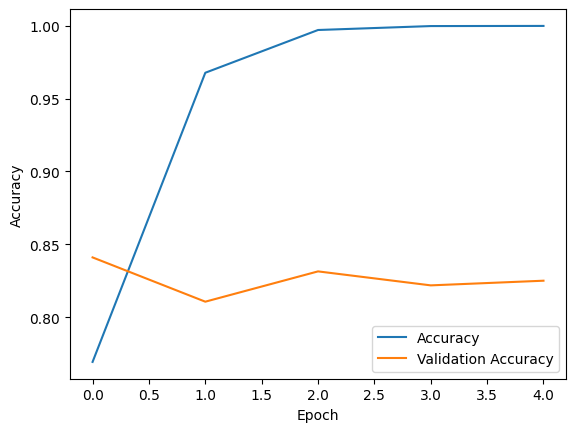

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()